Author: Lin Mulikas
E-Mail: wangdl2020@mail.sustech.edu.cn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['font.size'] = '14'

In [3]:
v1a = np.array([0, 0.5026, 1.0349, 1.4960, 2.060, 
               2.514, 3.030, 3.496, 4.036, 4.513, 
               5.018,   5.506, 6.033, 6.514, 7.030])

i1a = np.array([0, 22, 32, 36, 44, 
                48, 52, 57, 62, 67, 
                72, 76, 80, 84, 88])

v1b = np.array([0.503, 1.001, 1.534, 2.000, 2.500,
                3.050, 3.495, 3.918, 4.517, 4.960,
                5.481, 6.100, 6.565, 6.932])

i1b = np.array([28, 35, 42, 47, 53, 59, 64, 68, 74, 78, 82, 88, 91, 94])
v1a, v1b, i1a, i1b

(array([0.    , 0.5026, 1.0349, 1.496 , 2.06  , 2.514 , 3.03  , 3.496 ,
        4.036 , 4.513 , 5.018 , 5.506 , 6.033 , 6.514 , 7.03  ]),
 array([0.503, 1.001, 1.534, 2.   , 2.5  , 3.05 , 3.495, 3.918, 4.517,
        4.96 , 5.481, 6.1  , 6.565, 6.932]),
 array([ 0, 22, 32, 36, 44, 48, 52, 57, 62, 67, 72, 76, 80, 84, 88]),
 array([28, 35, 42, 47, 53, 59, 64, 68, 74, 78, 82, 88, 91, 94]))

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
l_model_1 = LinearRegression()
l_model_2 = LinearRegression()
l_model_1.fit(i1a.reshape((-1, 1)), v1a.reshape((-1, )))
l_model_2.fit(i1b.reshape((-1, 1)), v1b.reshape((-1, )))

k1a = l_model_1.coef_[0]
b1a = l_model_1.intercept_
k1b = l_model_2.coef_[0]
b1b = l_model_2.intercept_
k1a, b1a, k1b, b1b

(0.08789769141977685,
 -1.2861737976144676,
 0.09784372613896662,
 -2.556920335963347)

In [6]:
xline_1a = np.linspace(np.min(i1a), np.max(i1a))
xline_1b = np.linspace(np.min(i1b), np.max(i1b))
l1a = k1a * xline_1a + b1a
l1b = k1b * xline_1b + b1b
k1a, b1a, k1b, b1b

(0.08789769141977685,
 -1.2861737976144676,
 0.09784372613896662,
 -2.556920335963347)

In [7]:
def c_sign(number: float):
    return '+' if number > 0 else '-'

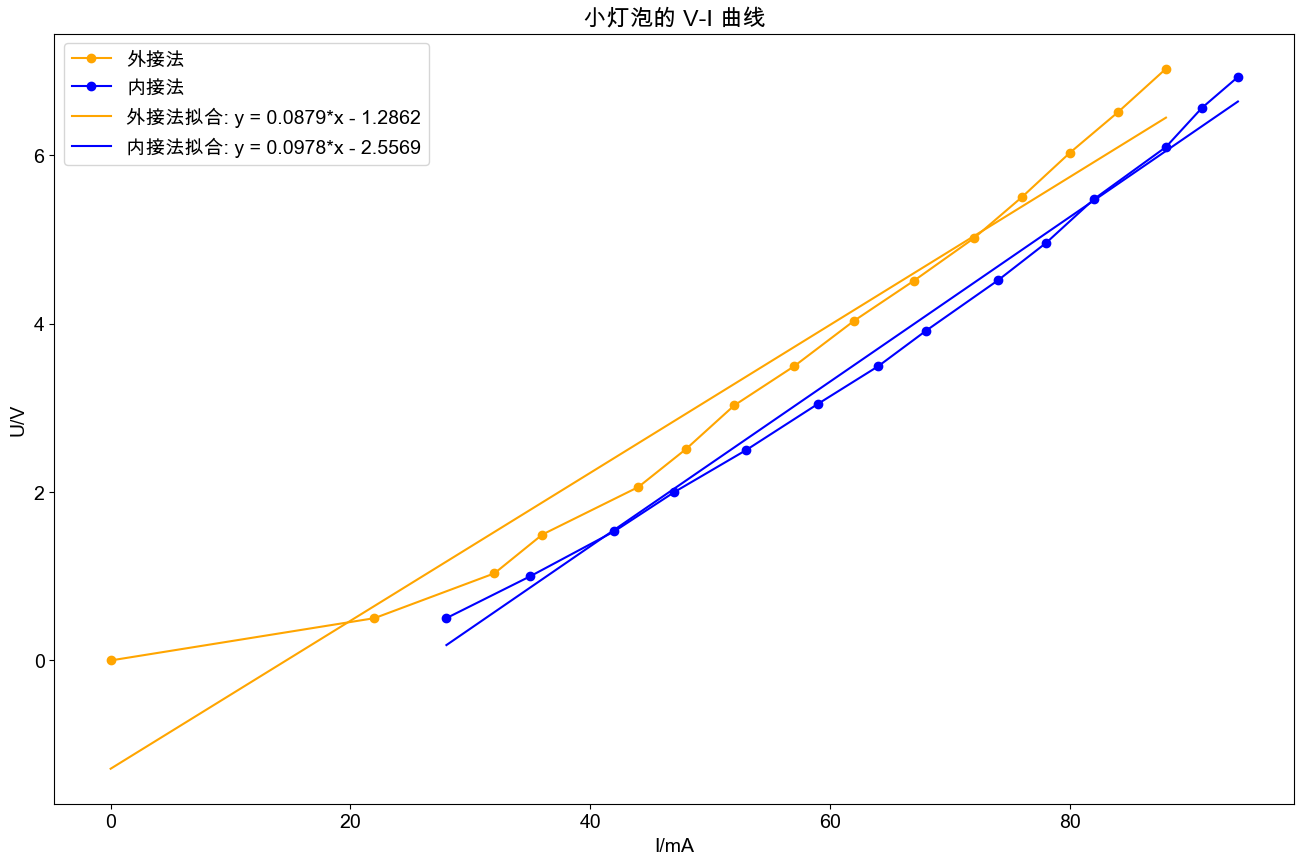

In [8]:
plt.figure(figsize=(16, 10))
plt.title("小灯泡的 V-I 曲线")
plt.plot(i1a, v1a, marker='o', c='orange')
plt.plot(i1b, v1b, marker='o', c='blue')
plt.plot(xline_1a, l1a, c='orange')
plt.plot(xline_1b, l1b, c='blue')
plt.legend(["外接法", 
            "内接法", 
            "外接法拟合: y = {:.4f}*x {} {:.4f}".format(
                k1a, 
                c_sign(b1a), 
                abs(b1a)), 
            "内接法拟合: y = {:.4f}*x {} {:.4f}".format(
                k1b, 
                c_sign(b1b), 
                abs(b1b))
            ])
plt.xlabel("I/mA")
plt.ylabel("U/V")
plt.show()

In [9]:
i2 = [1] + list(range(2, 10, 2)) + list(range(10, 55, 5))
v_r = np.array([1.842, 1.861, 1.915, 1.947, 1.970, 1.990, 2.025, 2.048, 2.051, 2.052, 2.054, 2.059, 2.060, 2.066])
c1 = "red"

v_g = np.array([2.437, 2.508, 2.642, 2.720, 2.790, 2.843, 2.952, 3.023, 3.082, 3.133, 3.162, 3.220, 3.278, 3.314])
c2 = "green"

v_b = np.array([2.834, 2.894, 2.983, 3.063, 3.128, 3.173, 3.270, 3.338, 3.386, 3.428, 3.467, 3.487, 3.516, 3.534])
c3 = "blue"

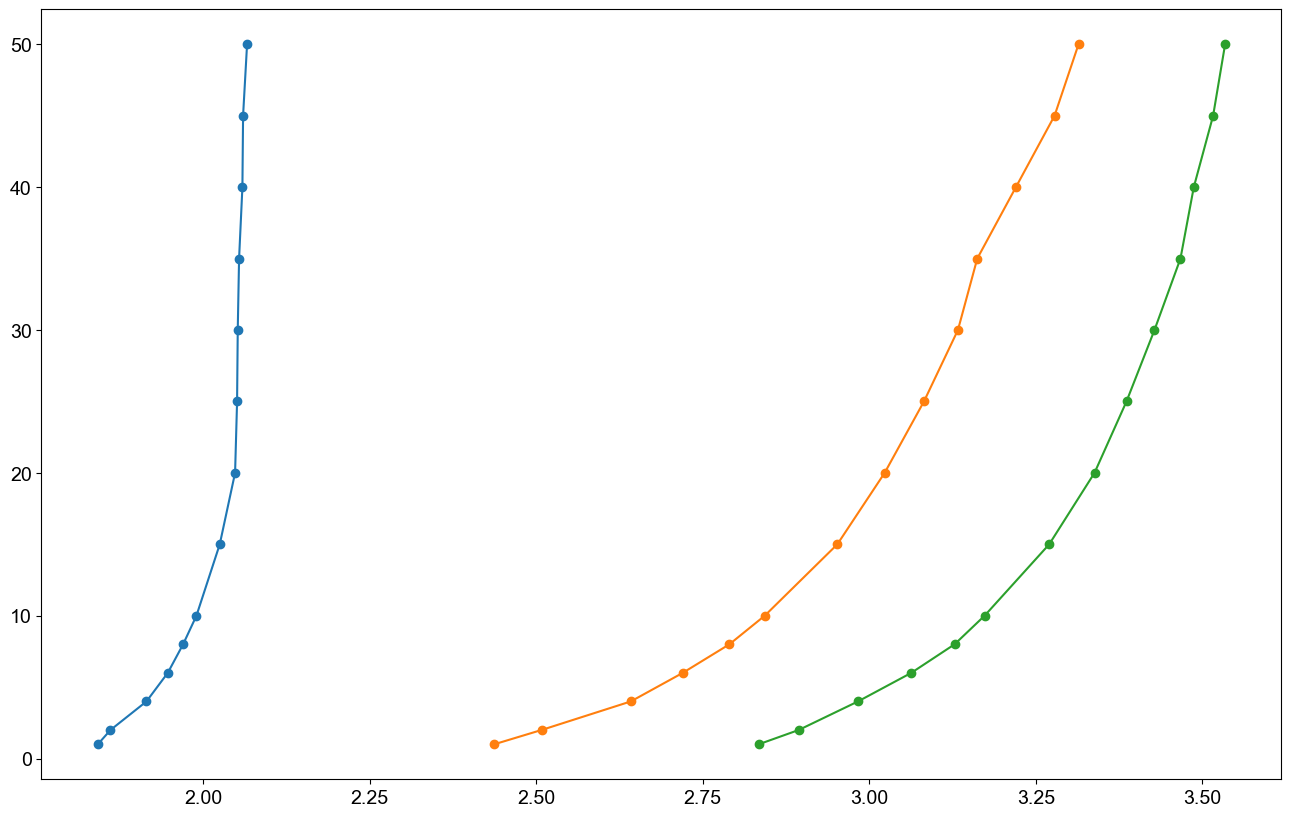

In [10]:
plt.figure(figsize=(16, 10))
plt.plot(v_r, i2, marker='o')
plt.plot(v_g, i2, marker='o')
plt.plot(v_b, i2, marker='o')
plt.show()

In [11]:
i21 = np.array(i2[8:]).reshape((-1, ))
_v_r = np.array(v_r[8:]).reshape((-1, 1))
i22 = np.array(i2[-7:]).reshape((-1, ))
_v2 = np.array(v_g[-7:]).reshape((-1, 1))
i23 = np.array(i2[-5:]).reshape((-1, ))
_v3 = np.array(v_b[-5:]).reshape((-1, 1))

In [12]:
lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()
lm1.fit(_v_r, i21)
lm2.fit(_v2, i22)
lm3.fit(_v3, i23)
k21 = lm1.coef_[0]
b21 = lm1.intercept_
k22 = lm2.coef_[0]
b22 = lm2.intercept_
k23 = lm3.coef_[0]
b23 = lm3.intercept_
x_l2_1 = np.linspace(-b21/k21, np.max(_v_r) + 0.01)
y_2_1 = k21 * x_l2_1 + b21
x_l2_2 = np.linspace(-b22/k22, np.max(_v2) + 0.01)
y_2_2 = k22 * x_l2_2 + b22
x_l2_3 = np.linspace(-b23/k23, np.max(_v3) + 0.01)
y_2_3 = k23 * x_l2_3 + b23
k21, b21, k22, b22, k23, b23, -b21/k21, -b22/k22, -b23/k23

(1585.3658536585492,
 -3223.5975609756365,
 103.02230698557423,
 -291.9044975376535,
 188.3334295445363,
 -616.6056687640713,
 2.0333461538461544,
 2.8334106086221467,
 3.2740107279693484)

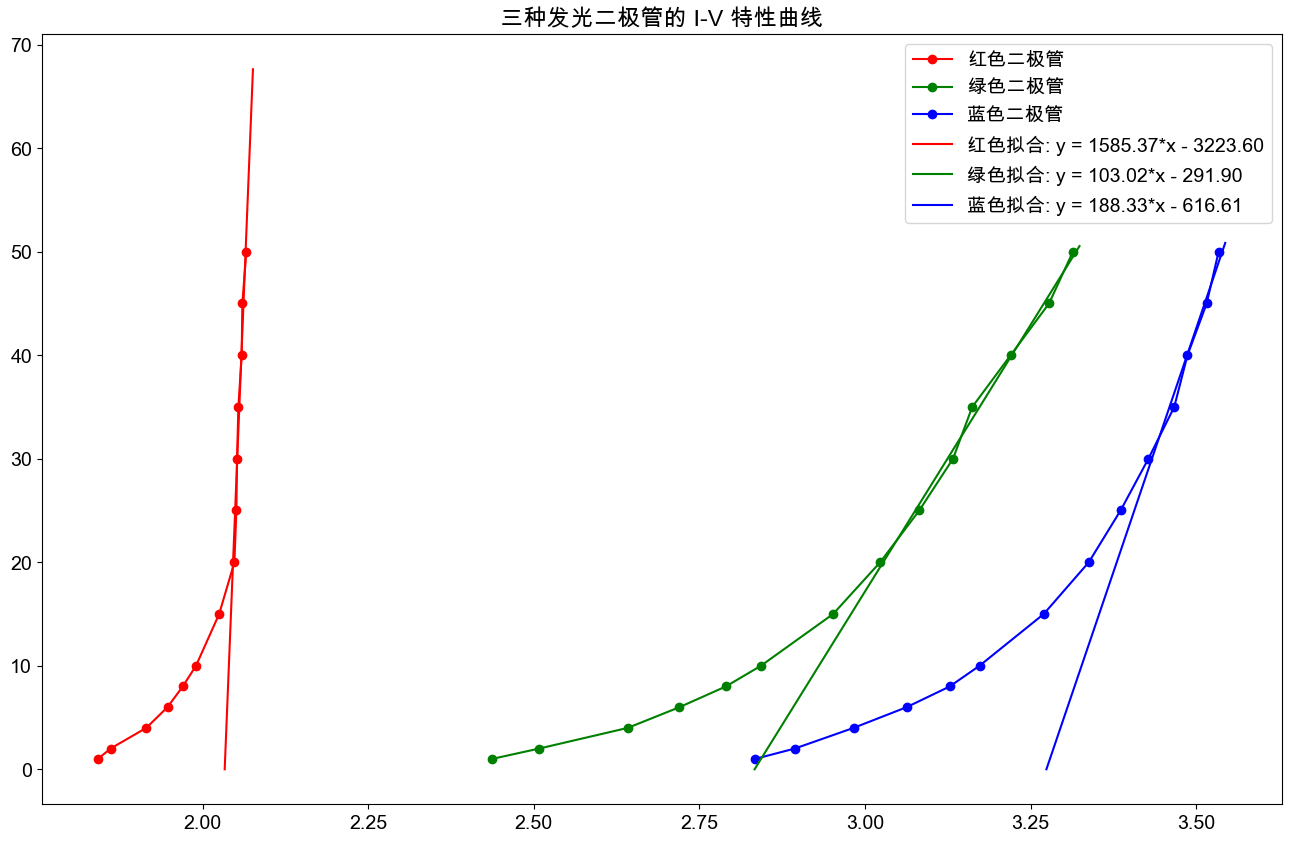

In [13]:
plt.figure(figsize=(16, 10))
plt.title("三种发光二极管的 I-V 特性曲线")
plt.plot(v_r, i2, marker='o', c=c1)
plt.plot(v_g, i2, marker='o', c=c2)
plt.plot(v_b, i2, marker='o', c=c3)

plt.plot(x_l2_1, y_2_1, c=c1)
plt.plot(x_l2_2, y_2_2, c=c2)
plt.plot(x_l2_3, y_2_3, c=c3)


plt.legend(["红色二极管", 
            "绿色二极管", 
            "蓝色二极管", 
            "红色拟合: y = {:.2f}*x {} {:.2f}".format(k21, c_sign(b21), abs(b21)), 
            "绿色拟合: y = {:.2f}*x {} {:.2f}".format(k22, c_sign(b22), abs(b22)), 
            "蓝色拟合: y = {:.2f}*x {} {:.2f}".format(k23, c_sign(b23), abs(b23))])

plt.show()

In [21]:
i3_p = np.array(i2).reshape((-1, ))
v_p = np.array([0.762, 0.773, 0.789, 0.800, 0.808, 0.813, 0.825, 0.834, 0.840, 0.844, 0.849, 0.853, 0.857, 0.862]).reshape((-1, 1))
i3_n = -np.array(i2).reshape((-1, ))
v_n = -np.array([2.523, 2.709, 2.934, 3.086, 3.200, 3.288, 3.436, 3.546, 3.613, 3.673, 3.716, 3.753, 3.784, 3.813]).reshape((-1, 1))

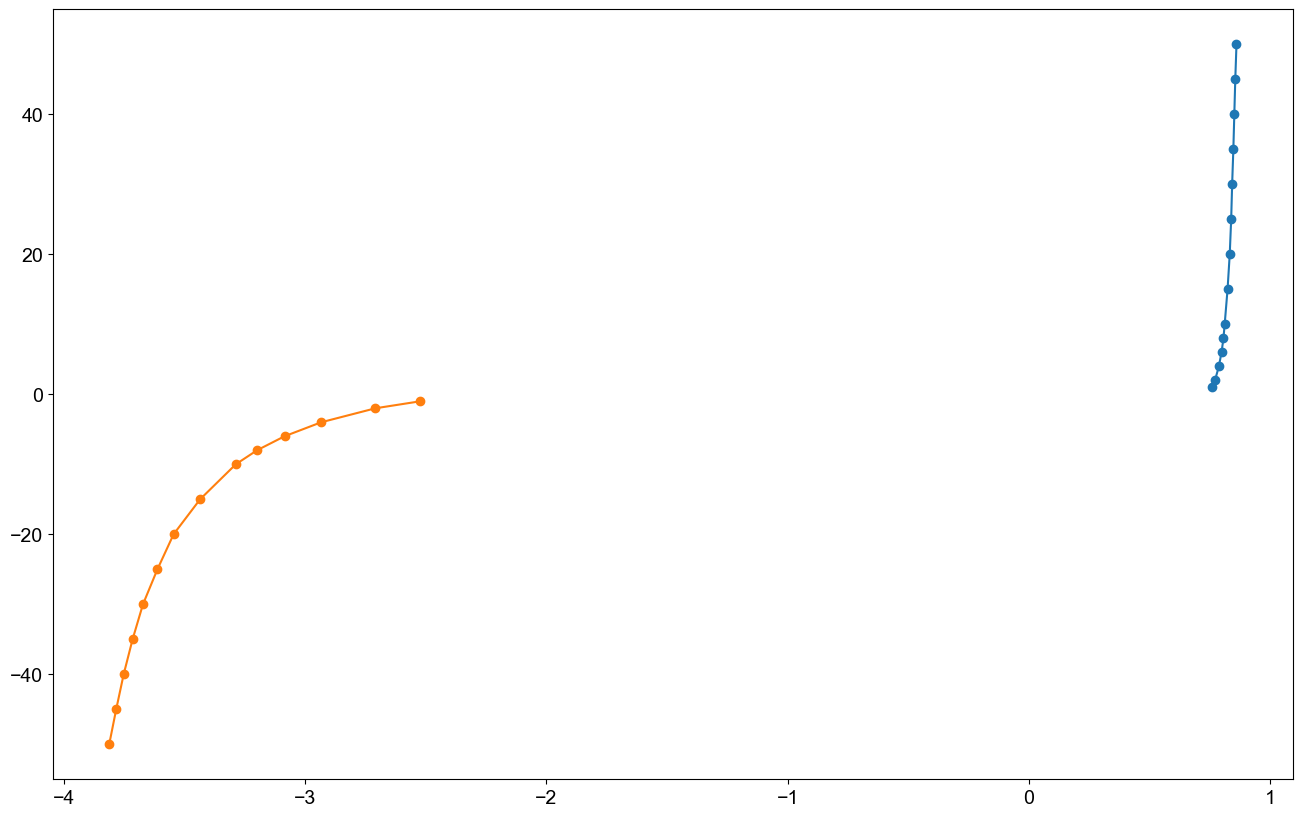

In [25]:
plt.figure(figsize=(16, 10))
plt.plot(v_p, i3_p, marker='o')
plt.plot(v_n, i3_n, marker='o')
plt.show()

In [35]:
l31 = LinearRegression()
l32 = LinearRegression()
l31.fit(v_p[-6:], i3_p[-6:])
l32.fit(v_n[-4:], i3_n[-4:])
k31 = l31.coef_[0]
b31 = l31.intercept_
k32 = l32.coef_[0]
b32 = l32.intercept_
k31, b31, k32, b32, -b31/k31, -b32/k32

(1142.3593827775003,
 -934.4574415131899,
 154.7779273216692,
 540.4710632570672,
 0.8180065359477124,
 -3.4919130434782617)

In [36]:
x31 = np.linspace(np.min(v_p[-6:]), -b31/k31)
y31 = k31 * x31 + b31
x32 = np.linspace(-b32/k32, np.max(v_n[-4:]))
y32 = k32 * x32 + b32

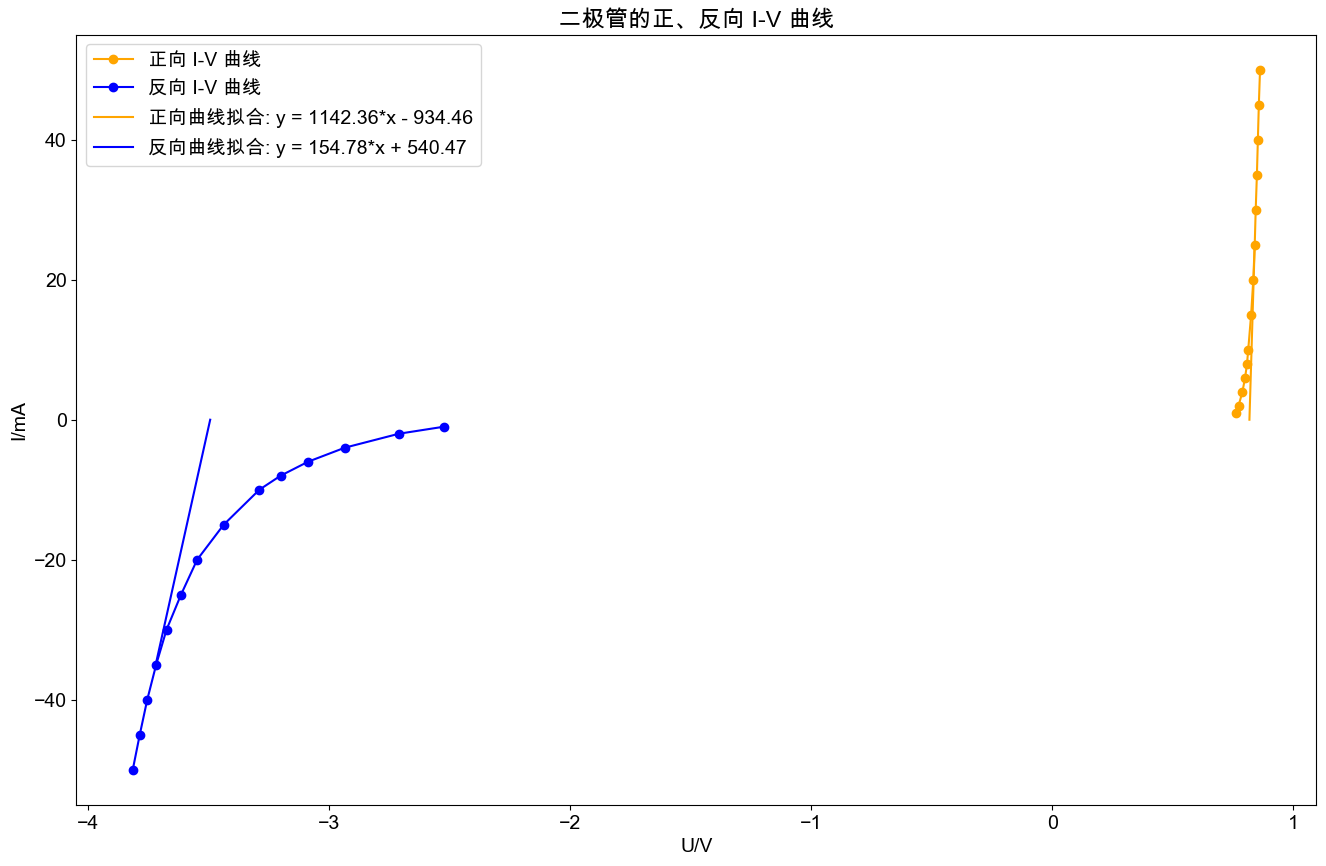

In [37]:
plt.figure(figsize=(16, 10))
plt.title("二极管的正、反向 I-V 曲线")
plt.plot(v_p, i3_p, marker='o', c='orange')
plt.plot(v_n, i3_n, marker='o', c='blue')
plt.plot(x31, y31, c='orange')
plt.plot(x32, y32, c='blue')
plt.legend(["正向 I-V 曲线", 
            "反向 I-V 曲线", 
            "正向曲线拟合: y = {:.2f}*x {} {:.2f}".format(k31, c_sign(b31), abs(b31)), 
            "反向曲线拟合: y = {:.2f}*x {} {:.2f}".format(k32, c_sign(b32), abs(b32))])

plt.xlabel("U/V")
plt.ylabel("I/mA")

plt.show()

In [1]:
Us = [2.033, 2.833, 3.274, 0.]
h = 6.62607015e-34
e = 1.6021766208e-19
c = 299792458 
for u in Us:
    print(h * c /(e * u))

6.09858334750026e-07
4.37642779578822e-07
3.7869333981270704e-07
